<a href="https://colab.research.google.com/github/YugantGotmare/Deep_learning_project/blob/main/Happy_Vs_Angry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [3]:
data_dir = '/content/gdrive/MyDrive/data/Data2' 

In [4]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [5]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

In [6]:
data = tf.keras.utils.image_dataset_from_directory('/content/gdrive/MyDrive/data/Data2')

Found 585 files belonging to 2 classes.


In [7]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [8]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [9]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_df = train.map(process)
validation_df = val.map(process)

In [39]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [42]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [43]:
history = model.fit(train,epochs=10,validation_data=val)

Epoch 1/10
13/13 [==============================] - 5s 259ms/step - loss: 190.5614 - accuracy: 0.5601 - val_loss: 2.6802 - val_accuracy: 0.7396
Epoch 2/10
13/13 [==============================] - 4s 260ms/step - loss: 1.0413 - accuracy: 0.5938 - val_loss: 0.4782 - val_accuracy: 0.7292
Epoch 3/10
13/13 [==============================] - 4s 272ms/step - loss: 0.5256 - accuracy: 0.7740 - val_loss: 0.4221 - val_accuracy: 0.8958
Epoch 4/10
13/13 [==============================] - 4s 267ms/step - loss: 0.3706 - accuracy: 0.8966 - val_loss: 0.2994 - val_accuracy: 0.9062
Epoch 5/10
13/13 [==============================] - 4s 264ms/step - loss: 0.3254 - accuracy: 0.8942 - val_loss: 0.2114 - val_accuracy: 0.9583
Epoch 6/10
13/13 [==============================] - 4s 265ms/step - loss: 0.2458 - accuracy: 0.9231 - val_loss: 0.2624 - val_accuracy: 0.9479
Epoch 7/10
13/13 [==============================] - 4s 264ms/step - loss: 0.2219 - accuracy: 0.9639 - val_loss: 0.3204 - val_accuracy: 0.9062
Epoc

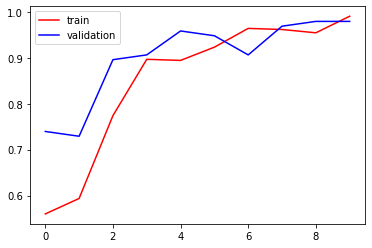

In [44]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

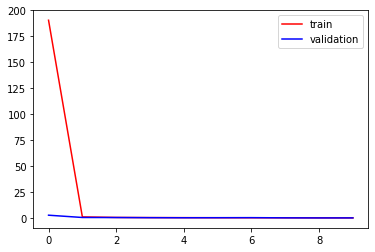

In [45]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [46]:
import cv2

In [53]:
test_img = cv2.imread('/content/happy2.webp')

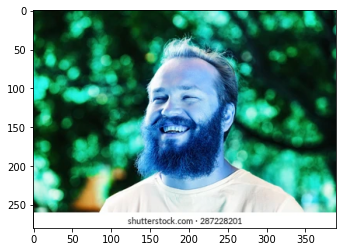

In [54]:
plt.imshow(test_img)

In [55]:
test_img.shape

(280, 390, 3)

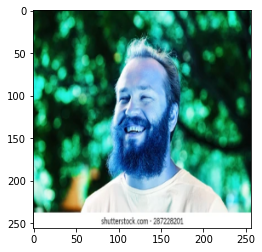

In [56]:
resize = tf.image.resize(test_img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [57]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [58]:
if yhat > 0.5: 
    print("Happy")
else:
    print("Angry")

Happy
